In [1]:
#!pip install scikit-bio
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.1.2 -> 23.2.1


[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
#from skbio.diversity import beta_diversity
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits import mplot3d

                  Espécie  Expectativa de vida (ano)  Média de descendentes  \
0        Acinonyx jubatus                        8.0                    2.1   
1      Aepyceros melampus                       15.0                    1.0   
2   Aepyprymnus rufescens                        6.0                    1.0   
3  Ailuropoda melanoleuca                       12.5                    1.7   
4         Ailurus fulgens                       14.0                    2.0   

   Período de gestação (dia)  
0                       92.5  
1                      197.1  
2                       23.0  
3                      137.5  
4                      134.0  


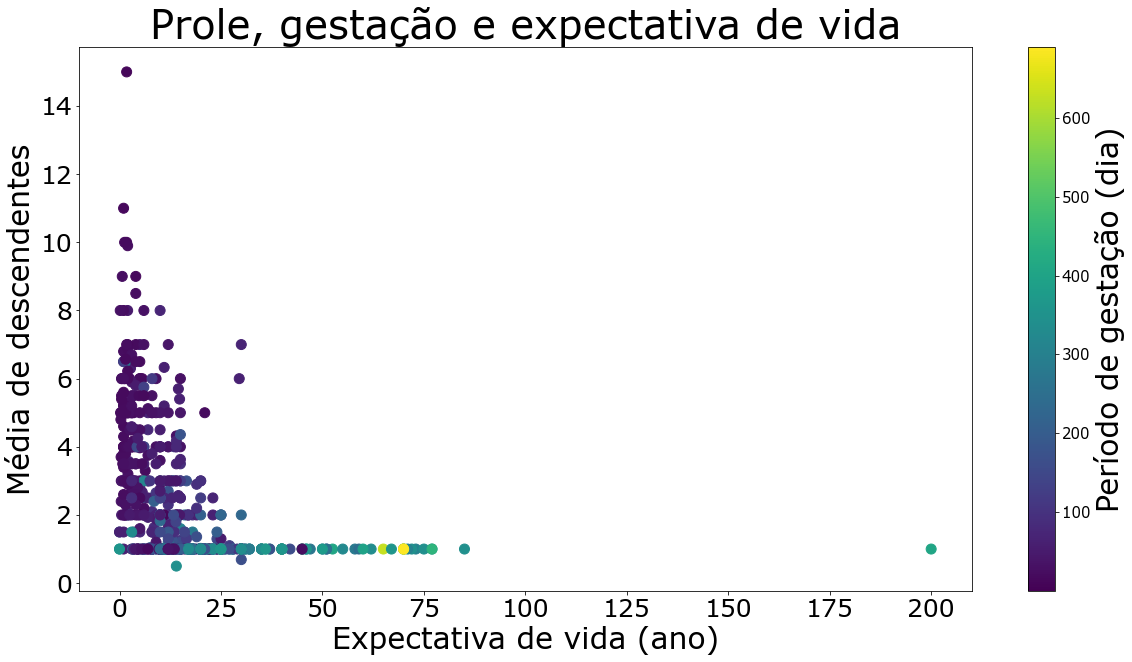

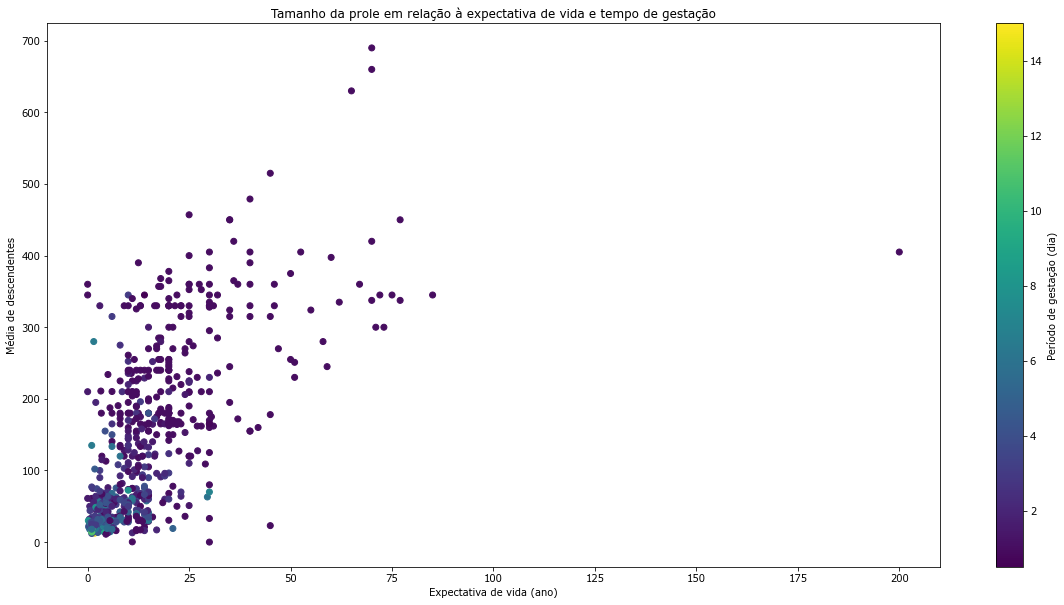

In [134]:
arquivo_excel = 'ADW - lifespan, offspring and gestation.xls'

df = pd.read_excel(arquivo_excel)

df = df.dropna()

df.columns = ['Espécie', 'Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']

minutos_dia = 24 * 60

# Aplique a transformação na coluna
df['Período de gestação (dia)'] = df['Período de gestação (dia)'] / minutos_dia

print(df.head())

# Plotar um gráfico com três atributos

plt.figure(figsize=(20, 10))  # Define o tamanho do gráfico                
scatter = plt.scatter(df['Expectativa de vida (ano)'], df['Média de descendentes'], c=df['Período de gestação (dia)'], cmap='viridis', s = 100)  # Plota o gráfico de dispersão

colorbar = plt.colorbar(scatter, shrink=1)
colorbar.set_label('Período de gestação (dia)', fontsize=30)
colorbar.ax.tick_params(labelsize=30)

colorbar.ax.tick_params(labelsize=15)
plt.rcParams['legend.fontsize'] = 25
plt.tick_params(labelsize=25)
plt.xlabel('Expectativa de vida (ano)', size=30)
plt.ylabel('Média de descendentes', size=30)
plt.title('Prole, gestação e expectativa de vida', size=40)
plt.savefig('Dispersão')
plt.show()

plt.figure(figsize=(20, 10))  # Define o tamanho do gráfico
plt.scatter(df['Expectativa de vida (ano)'], df['Período de gestação (dia)'], c=df['Média de descendentes'], cmap='viridis')  # Plota o gráfico de dispersão
plt.colorbar(label='Período de gestação (dia)')
plt.xlabel('Expectativa de vida (ano)')
plt.ylabel('Média de descendentes')
plt.title('Tamanho da prole em relação à expectativa de vida e tempo de gestação')
plt.show()

                           Expectativa de vida (ano)  Média de descendentes  \
Expectativa de vida (ano)                   1.000000              -0.436560   
Média de descendentes                      -0.436560               1.000000   
Período de gestação (dia)                   0.647878              -0.560341   

                           Período de gestação (dia)  
Expectativa de vida (ano)                   0.647878  
Média de descendentes                      -0.560341  
Período de gestação (dia)                   1.000000  


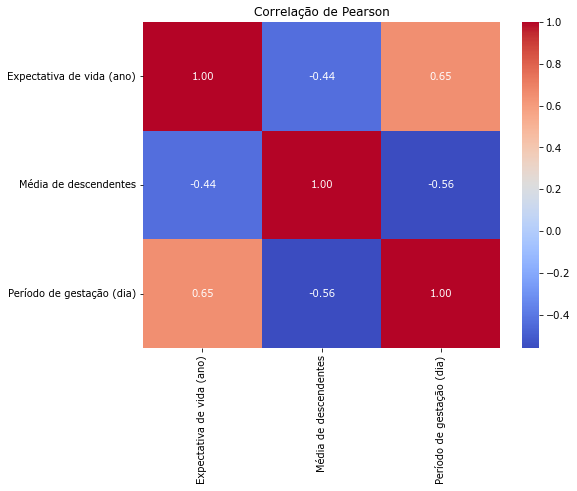

In [47]:
# Calcula a matriz de correlação
correlacao = df[['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']].corr()

# Exibe a matriz de correlação
print(correlacao)

# Crie um mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Pearson')
#plt.savefig('Correlação de Pearson')
plt.show()

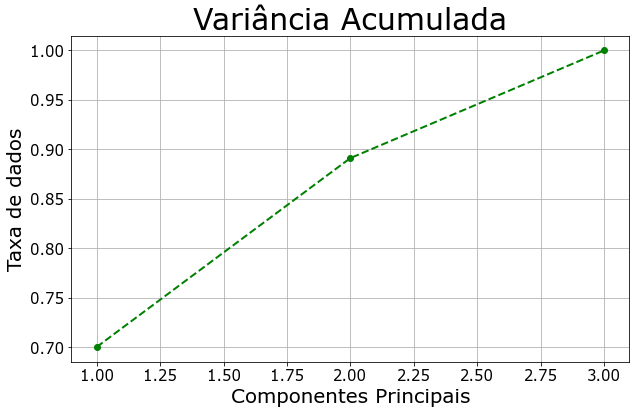

In [193]:
# Seleciona apenas os atributos numéricos a incluir no PCA
atributos = ['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']
X = df[atributos]

# Padroniza os dados (média zero e variância unitária)
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Realiza a análise de componentes principais (PCA)
pca = PCA()
componentes_principais = pca.fit_transform(X_padronizado)

# Variância explicada por cada componente principal
variância_explicada = pca.explained_variance_ratio_

# Plota o gráfico da variância explicada acumulada
plt.figure(figsize = (10, 6))
plt.rcParams['font.family'] = 'Verdana'
plt.plot(range(1, len(variância_explicada) + 1), variância_explicada.cumsum(), linewidth=2, marker='o', linestyle='--', color='green')
plt.title('Variância Acumulada', size=30)
plt.xlabel('Componentes Principais', size=20)
plt.ylabel('Taxa de dados', size=20)
plt.tick_params(labelsize=15) # tamanho do rótulo
plt.grid()
plt.rcParams['legend.fontsize'] = 20 # tamanho da legenda
plt.savefig('Variância')
plt.show()

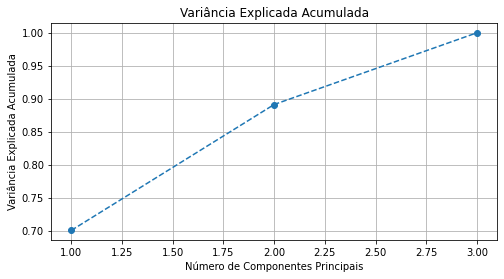

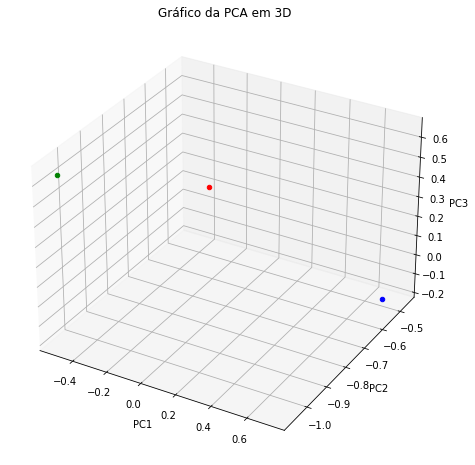

In [6]:
# Seleciona apenas os atributos numéricos a incluir no PCA
atributos = ['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']
X = df[atributos]

# Padroniza os dados (média zero e variância unitária)
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Realiza a análise de componentes principais (PCA) com três componentes principais
pca = PCA(n_components=3)
componentes_principais = pca.fit_transform(X_padronizado)

# Variância explicada por cada componente principal
variância_explicada = pca.explained_variance_ratio_

# Plote o gráfico da variância explicada acumulada
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(variância_explicada) + 1), variância_explicada.cumsum(), marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid()
plt.show()

# Plote o gráfico da PCA em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cores = ['r','b','g']

for i in range(len(cores)):
    ax.scatter(componentes_principais[:, 0][i], componentes_principais[:, 1][i], componentes_principais[:, 2][i],
               c=cores[i], marker='o', label=f'PC{i+1}')

ax.set_title('Gráfico da PCA em 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

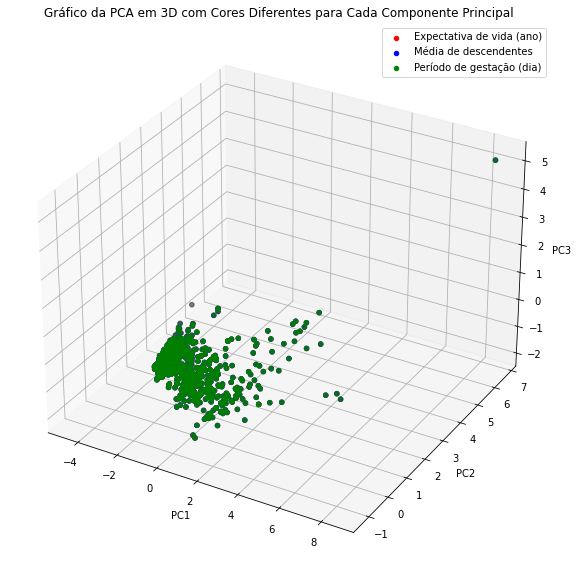

In [7]:
# Seleciona apenas os atributos numéricos a incluir no PCA
atributos = ['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']
X = df[atributos]

# Padroniza os dados (média zero e variância unitária)
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Realiza a análise de componentes principais (PCA) com três componentes principais
pca = PCA(n_components=3)
componentes_principais = pca.fit_transform(X_padronizado)

# Plote o gráfico da PCA em 3D com cada componente principal em uma cor diferente
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

cores = ['r', 'b', 'g']

for i in range(len(cores)):
    # Atribua uma cor diferente para cada componente principal
    ax.scatter(componentes_principais[:, 0], componentes_principais[:, 1], componentes_principais[:, 2], c=cores[i], marker='o', label=f'{atributos[i]}')

ax.set_title('Gráfico da PCA em 3D com Cores Diferentes para Cada Componente Principal')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

plt.show()

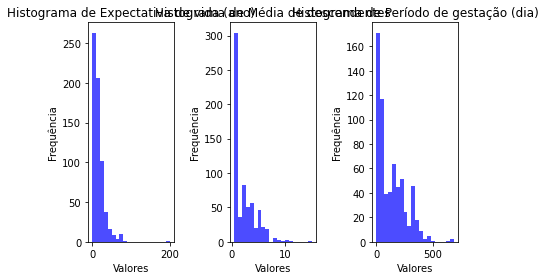

In [8]:
for i, atributo in enumerate(atributos, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[atributo], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de {atributo}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

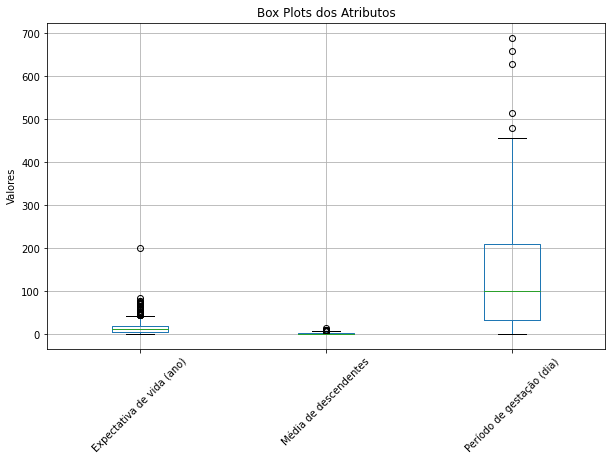

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecione os atributos numéricos para criar box plots
atributos = ['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']

# Crie box plots para cada atributo
plt.figure(figsize=(10, 6))
df[atributos].boxplot()
plt.title('Box Plots dos Atributos')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


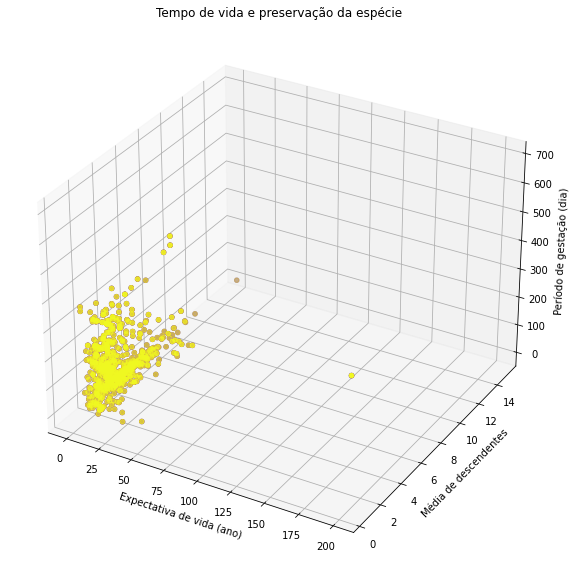

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plote os atributos em cada eixo
ax.set_xlabel('Expectativa de vida (ano)')
ax.set_ylabel('Média de descendentes')
ax.set_zlabel('Período de gestação (dia)')

cval = np.linspace(0,1,3)
cores = plt.get_cmap("plasma")(cval)

# Plote os pontos de dados
for i, (coluna, cor) in enumerate(zip(df.columns, cores)):
    ax.scatter(df['Expectativa de vida (ano)'], df['Média de descendentes'], df['Período de gestação (dia)'], c=cores[i])

# Exiba o gráfico tridimensional
plt.title('Tempo de vida e preservação da espécie')
plt.show()

In [11]:
# Defina as variáveis independentes (atributos)
X = df['Expectativa de vida (ano)']

# Defina a variável dependente
y = df['Período de gestação (dia)']  # Substitua 'VariavelDependente' pelo nome real da sua variável dependente

# Crie o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Exiba os resultados da regressão
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Período de gestação (dia)   R-squared (uncentered):                   0.684
Model:                                   OLS   Adj. R-squared (uncentered):              0.684
Method:                        Least Squares   F-statistic:                              1405.
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                   2.12e-164
Time:                               19:50:18   Log-Likelihood:                         -3926.6
No. Observations:                        649   AIC:                                      7855.
Df Residuals:                            648   BIC:                                      7860.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                                coef    std err   

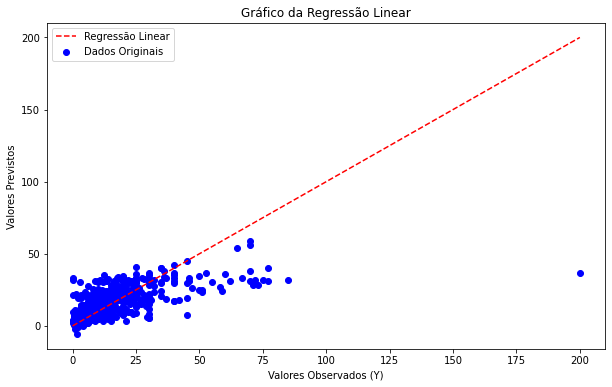

In [12]:
X = df[['Média de descendentes', 'Período de gestação (dia)']] #.values.reshape(-1, 1)
Y = df['Expectativa de vida (ano)']

modelo = LinearRegression()
modelo.fit(X, Y)

intercepto = modelo.intercept_
coeficientes = modelo.coef_

# Previsões do modelo
previsoes = modelo.predict(X)

# Plote o gráfico
plt.figure(figsize=(10, 6))

# Scatter plot dos dados originais
plt.scatter(Y, previsoes, c='b', label='Dados Originais')

# Linha da regressão
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], linestyle='--', c='r', label='Regressão Linear')

plt.title('Gráfico da Regressão Linear')
plt.xlabel('Valores Observados (Y)')
plt.ylabel('Valores Previstos')
plt.legend(loc='upper left')

plt.show()

### Normalização

In [13]:
df_3 = df[['Expectativa de vida (ano)', 'Média de descendentes', 'Período de gestação (dia)']]

In [14]:
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado

df_normalizado = normalizar(df_3)
df_normalizado

,Expectativa de vida (ano),Média de descendentes,Período de gestação (dia)
0,0.0400,0.110345,0.134053
1,0.0750,0.034483,0.285648
2,0.0300,0.034483,0.033328
3,0.0625,0.082759,0.199271
4,0.0700,0.103448,0.194198
...,...,...,...
646,0.0850,0.034483,0.478258
647,0.1000,0.034483,0.478258
648,0.0050,0.351724,0.026082
649,0.0300,0.344828,0.026082


### Correlação de Pearson

C:\Users\RAPHAE~1\AppData\Local\Temp/ipykernel_24216/1828707382.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)


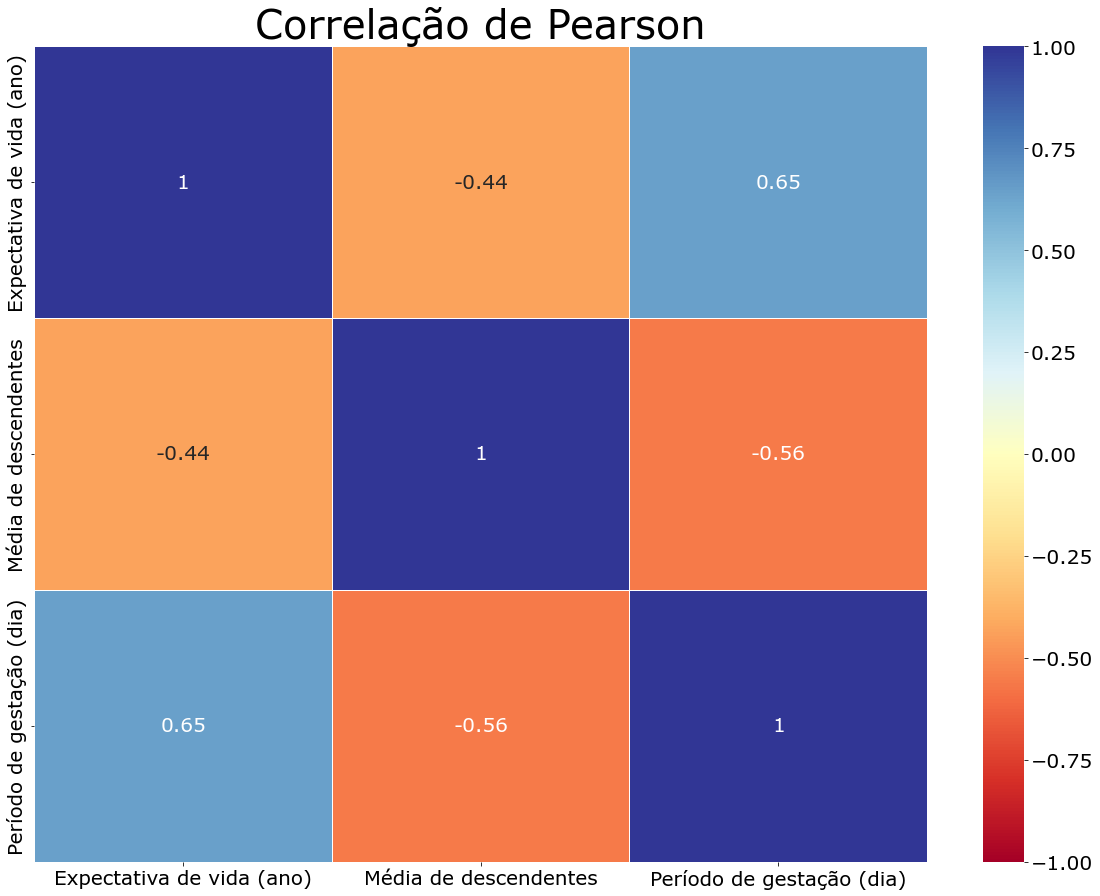

In [119]:
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(20, 15))
    heatmap=sns.heatmap(corrmat, ax = ax, cmap ="RdYlBu", linewidths = 1, vmin=-1, vmax=1, annot=True, annot_kws={"size": 20})    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
    plt.title('Correlação de Pearson', size=40)
    plt.rcParams['legend.fontsize'] = 20
    plt.tick_params(labelsize=20)
    plt.savefig('Correlação de Pearson')
    
Pearson(df_normalizado)

### Correlação de Spearman

In [120]:
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(20, 15))
    heatmap=sns.heatmap(spearmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 20})
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
    plt.rcParams['font.family'] = 'Verdana'
    plt.title('Correlação de Spearman', size=30)
    plt.rcParams['legend.fontsize'] = 20
    plt.tick_params(labelsize=20)
    plt.savefig('Correlação de Spearman')

C:\Users\RAPHAE~1\AppData\Local\Temp/ipykernel_24216/1944651895.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)


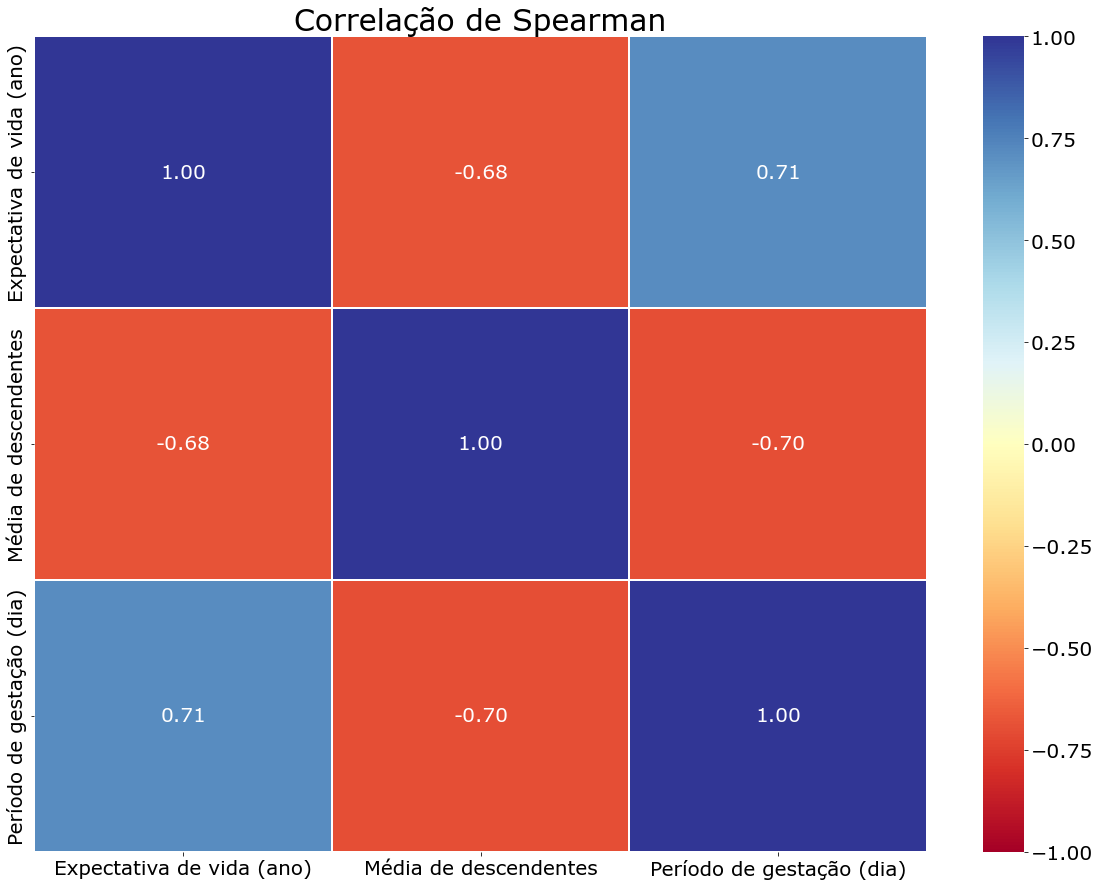

In [121]:
Spearman(df_normalizado, 3, 3)

### Análise por pares

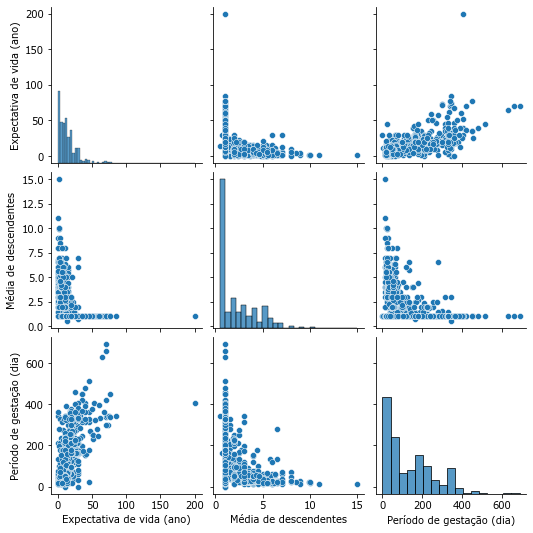

In [126]:
sns.pairplot(data = df_3)

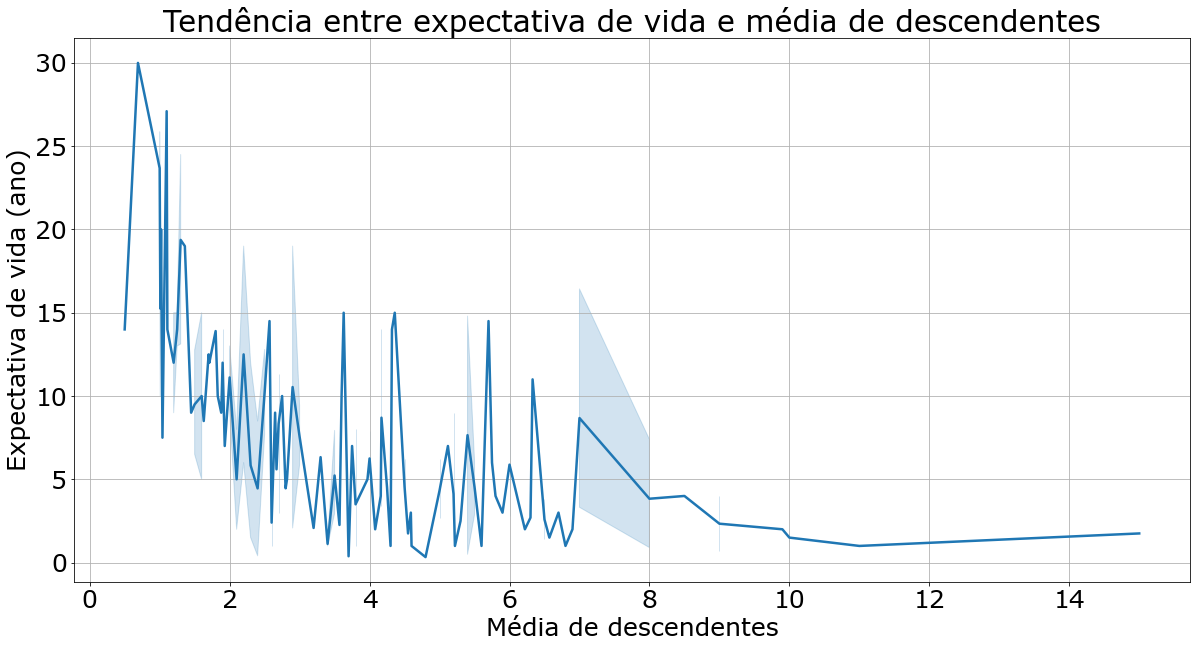

In [183]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data = df_3, y='Expectativa de vida (ano)', x='Média de descendentes', linewidth=2.5)

# Aumentar o tamanho do rótulo dos eixos x e y
ax.set_xlabel('Média de descendentes', fontsize=25)
ax.set_ylabel('Expectativa de vida (ano)', fontsize=25)

# Aumentar o tamanho dos números dos ticks nos eixos x e y
ax.tick_params(axis='both', which='major', labelsize=25)

# Adicionar um título (opcional)
plt.title("Tendência entre expectativa de vida e média de descendentes", fontsize=30)

ax.grid(True)

# Salvar a imagem em um arquivo (por exemplo, em formato PNG)
plt.savefig("tendência1.png")

# Mostrar o gráfico
plt.show()

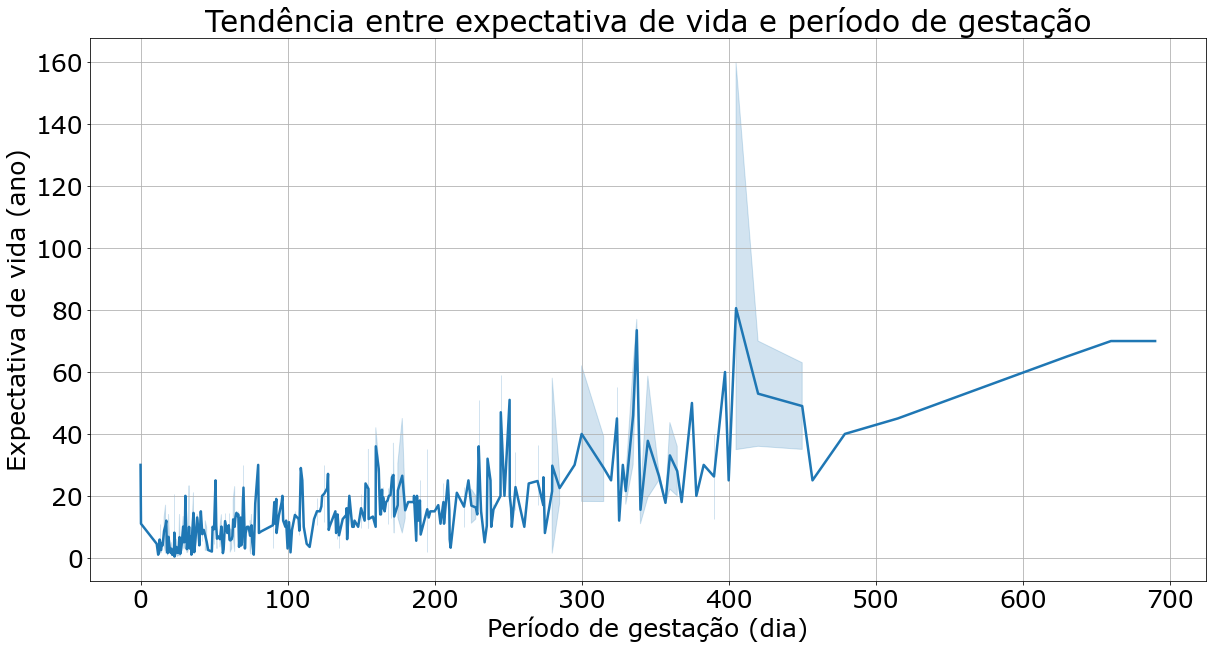

In [184]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data = df_3, y='Expectativa de vida (ano)', x='Período de gestação (dia)', linewidth=2.5)

# Aumentar o tamanho do rótulo dos eixos x e y
ax.set_xlabel('Período de gestação (dia)', fontsize=25)
ax.set_ylabel('Expectativa de vida (ano)', fontsize=25)

# Aumentar o tamanho dos números dos ticks nos eixos x e y
ax.tick_params(axis='both', which='major', labelsize=25)

# Adicionar um título (opcional)
plt.title("Tendência entre expectativa de vida e período de gestação", fontsize=30)
ax.grid(True)

# Salvar a imagem em um arquivo (por exemplo, em formato PNG)
plt.savefig("tendência2.png")

# Mostrar o gráfico
plt.show()

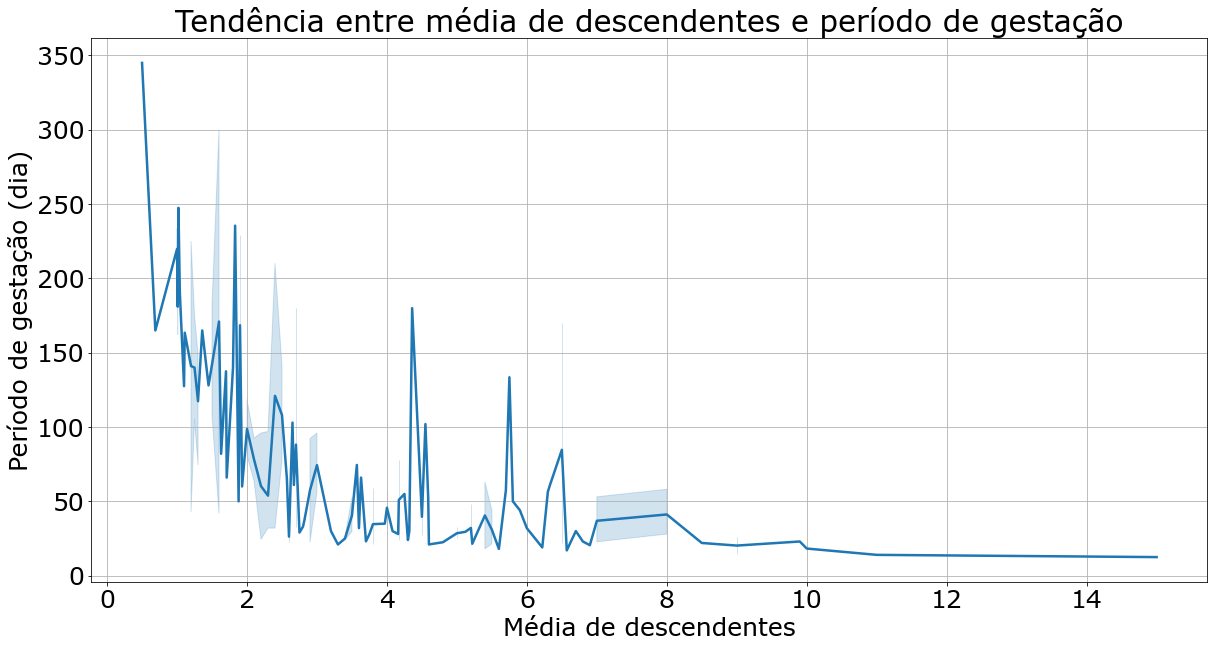

In [177]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data = df_3, y='Período de gestação (dia)', x='Média de descendentes', linewidth=2.5)

# Aumentar o tamanho do rótulo dos eixos x e y
ax.set_xlabel('Média de descendentes', fontsize=25)
ax.set_ylabel('Período de gestação (dia)', fontsize=25)

# Aumentar o tamanho dos números dos ticks nos eixos x e y
ax.tick_params(axis='both', which='major', labelsize=25)

# Adicionar um título (opcional)
plt.title("Tendência entre média de descendentes e período de gestação", fontsize=30)
ax.grid(True)

# Salvar a imagem em um arquivo (por exemplo, em formato PNG)
plt.savefig("tendência3.png")

# Mostrar o gráfico
plt.show()

In [22]:
#Determina o tamanho do teste, o ponto de início do algoritmo, os atributos e o dataframe utilizado

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 300
FEATURES = ['Expectativa de vida (ano)', 'Período de gestação (dia)', 'Média de descendentes']

data_frame = df_3
X = data_frame.reindex(FEATURES, axis=1)

In [23]:
#Normaliza os dados, pois o algoritmo se baseia em distâncias

normalizador = MinMaxScaler()
normalizador.fit(X)
X_norm = normalizador.transform(X)

In [24]:
#Análise dos componentes principais

pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

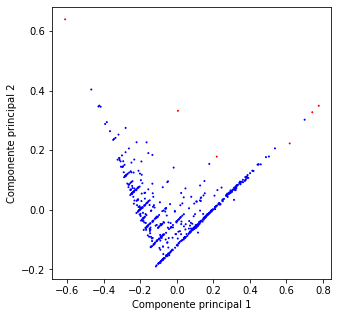

In [25]:
# Indica a fração de outlier que será detectada no conjunto de dados
FRACAO_OUTLIERS = 0.01

# Indica o número de vizinhos que serão considerados
N_VIZINHOS = 10


CORES = np.array(["red", "blue"])

#Gera o modelo de detecção de outliers
modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

# Plota o gráfico
fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()
fig.get_figure()
#fig.savefig("graficolof.png")

### Local Outlier Factor (LOF)

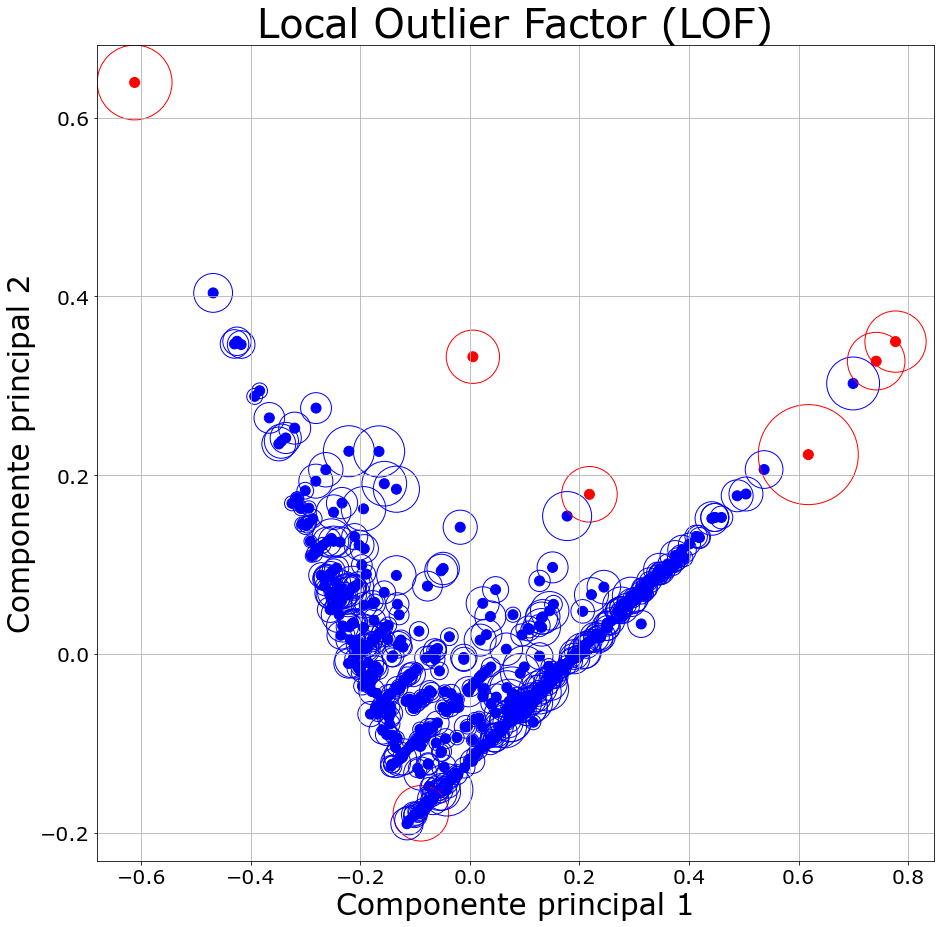

In [188]:
# Plota o gráfico com os círculos que são proporcionais ao LOF

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(15, 15))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    marker="o",
    s=100,
    color=CORES[(previsao + 1) // 2],
)

X_lof = modelo_lof.negative_outlier_factor_
raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=10000 * raios,
    edgecolors=CORES[(previsao + 1) // 2],
    facecolors="none",
)
eixo.set_xlabel("Componente principal 1", size=30)
eixo.grid(True)
eixo.set_ylabel("Componente principal 2", size=30)
eixo.tick_params(axis='both', which='major', labelsize=20)
plt.rcParams['font.family'] = 'Verdana'
eixo.set_title('Local Outlier Factor (LOF)', size=40)
plt.savefig('Outlier')
plt.show()

### Isolation Forest

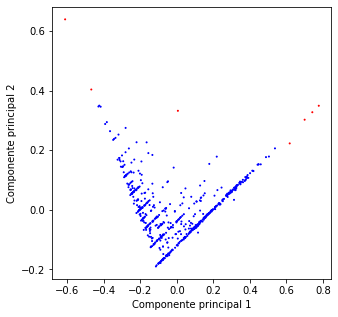

In [27]:
# Indica a fração de outlier que será detectada no conjunto de dados
FRACAO_OUTLIERS = 0.01

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajusta o modelo aos dados e realiza a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()
fig.get_figure()
#fig.savefig("graficoif.png")

In [28]:
# Para remoção dos dados considerados anômalos pelo algoritmo

'''
logic = previsao == 1
X_clean = X[logic]

print(X.shape)
print(X_clean.shape)
'''

'\nlogic = previsao == 1\nX_clean = X[logic]\n\nprint(X.shape)\nprint(X_clean.shape)\n'

In [29]:
sc = StandardScaler()
sc.fit(df_3) #fit
df_3_norm = sc.transform(df_3) #normalização

In [181]:
pca = PCA()
pca.fit(df_3_norm) #fit
df_pca = pca.transform(df_3_norm) #aplicação do PCA

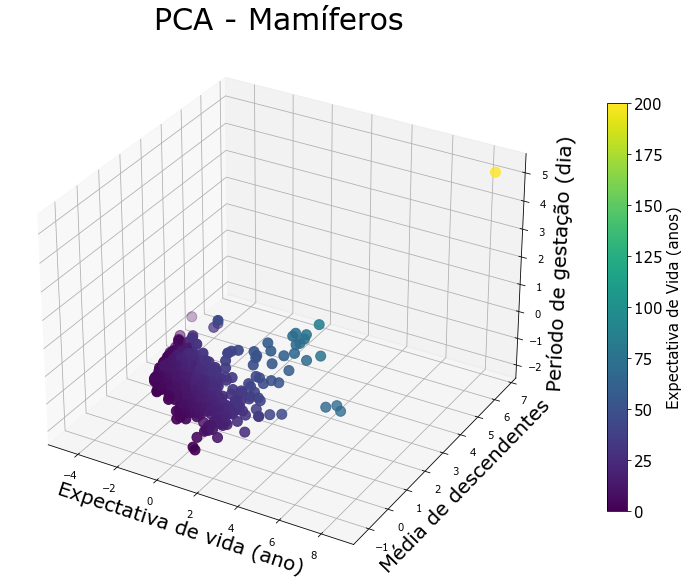

In [182]:
plt.figure(figsize = (20, 10))
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['legend.fontsize'] = 20
#plt.tick_params(labelsize=20)
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df_3['Expectativa de vida (ano)'].values, s = 100)

colorbar = plt.colorbar(scatter, shrink=0.75)
colorbar.set_label('Expectativa de Vida (anos)', fontsize=15)
colorbar.ax.tick_params(labelsize=15)

ax.set_xlabel('Expectativa de vida (ano)', size=20)
ax.set_ylabel('Média de descendentes', size=20)
ax.set_zlabel('Período de gestação (dia)', size=20)
ax.set_title('PCA - Mamíferos', size = 30)

#plt.xlim(-1,150)
#plt.ylim(-1,5)
#plt.grid()
#plt.legend()
plt.savefig('PCA')
plt.show()

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize = (15, 10))
plt.plot(variavel_x, variavel_y), linewidth=5, linestyle='-', color='mediumturquoise')
plt.xlabel('Legenda_x (unidade)', size=30)
plt.ylabel('Legenda_y (unidade)', size=30)
plt.title('Título do gráfico', size=40)
plt.tick_params(labelsize=20) # tamanho do rótulo
plt.rcParams['legend.fontsize'] = 20 # tamanho da legenda
#plt.xlim(-1,150)
#plt.ylim(-1,5)
plt.grid()
#plt.legend()
#plt.savefig('...')
plt.show()